In [126]:
import os
data_path = ['ConcreteDataSet']


In [127]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Concrete_Data.csv'])
data = pd.read_csv(filepath, sep = ',')

In [128]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [129]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [130]:
data['Fly Ash (component 3)(kg in a m^3 mixture)']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1025     90.3
1026    115.6
1027    108.6
1028      0.0
1029     78.3
Name: Fly Ash (component 3)(kg in a m^3 mixture), Length: 1030, dtype: float64

In [131]:
data.shape

(1030, 9)

In [132]:
data.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [133]:
data.isnull().sum()


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [134]:
names = ['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']
data.columns = names


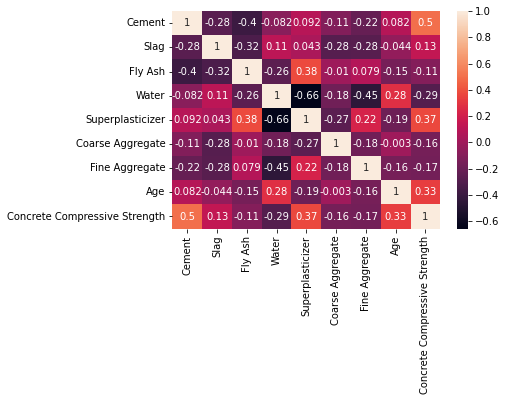

In [135]:
correlations = data.corr()
sns.heatmap(correlations, annot = True);

In [136]:
strength = 'Concrete Compressive Strength'
feature_cols = [x for x in data.columns if x != strength]
x_data = data[feature_cols]
y_data = data[strength]

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 42)

In [138]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

LR = LinearRegression()
LR = LR.fit(x_train, y_train)
y_lr_pred = LR.predict(x_test)

lr_r2 = r2_score(y_test, y_lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))

LASSO = Lasso()
LASSO = LASSO.fit(x_train, y_train)
y_lasso_pred = LASSO.predict(x_test)

lasso_r2 = r2_score(y_test, y_lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))

RR = Ridge()
RR = RR.fit(x_train, y_train)
y_rr_pred = RR.predict(x_test)

rr_r2 = r2_score(y_test, y_rr_pred)
rr_rmse = np.sqrt(mean_squared_error(y_test, y_rr_pred))




In [139]:
scores = ([lr_rmse, lr_r2], [lasso_rmse, lasso_r2], [rr_rmse, rr_r2])
 

labels = ['Linear', 'Lasso', 'Ridge']
regression_df = pd.DataFrame(data = scores, index = labels)
regression_df.rename(columns= {0 : 'RMSE', 1 : 'R2'}, inplace = True)
regression_df

,RMSE,R2
Linear,10.476202,0.594378
Lasso,10.451694,0.596274
Ridge,10.476186,0.594379


In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

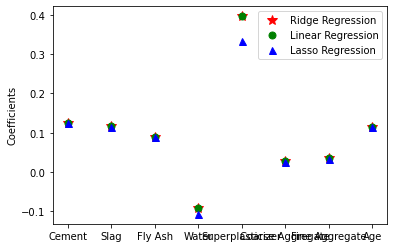

In [141]:
plt.plot(feature_cols,RR.coef_,linestyle='none',marker='*',markersize=10,color='red', label = 'Ridge Regression');
plt.plot(feature_cols, LR.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression');
plt.plot(feature_cols, LASSO.coef_,linestyle='none',marker='^',markersize=7,color='blue',label='Lasso Regression');
plt.ylabel('Coefficients')
plt.legend();

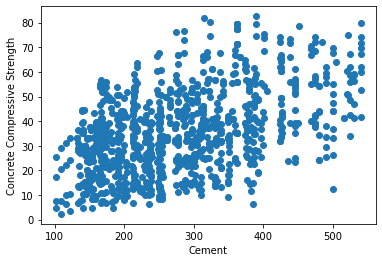

In [142]:
plt.scatter(data['Cement'], data['Concrete Compressive Strength'])
plt.xlabel('Cement')
plt.ylabel('Concrete Compressive Strength')
plt.show()

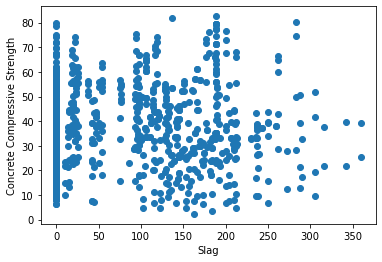

In [143]:
plt.scatter(data['Slag'], data['Concrete Compressive Strength'])
plt.xlabel('Slag')
plt.ylabel('Concrete Compressive Strength')
plt.show()

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
y_tree_pred = decision_tree.predict(x_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_tree_pred)))
print('R2:', r2_score(y_test, y_tree_pred))

RMSE: 6.937602012428206
R2: 0.8221178889699571


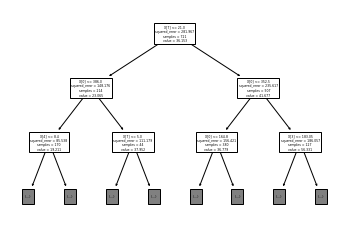

In [145]:
tree.plot_tree(decision_tree, max_depth = 2);